In [1]:
!pip install pandas numpy scikit-learn missingno

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno  # Optional: for visualizing missing data

In [4]:
!pip install kagglehub

In [6]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('salaries.csv')  # Replace 'your_dataset.csv' with your actual file path

# Display the first few rows of the dataset
print(df.head())

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Solutions Engineer  214000   
1       2025               SE              FT  Solutions Engineer  136000   
2       2025               MI              FT       Data Engineer  158800   
3       2025               MI              FT       Data Engineer  139200   
4       2025               EN              FT       Data Engineer   90000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU  

/home/davy/Documents/jupyter/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/davy/Documents/jupyter/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

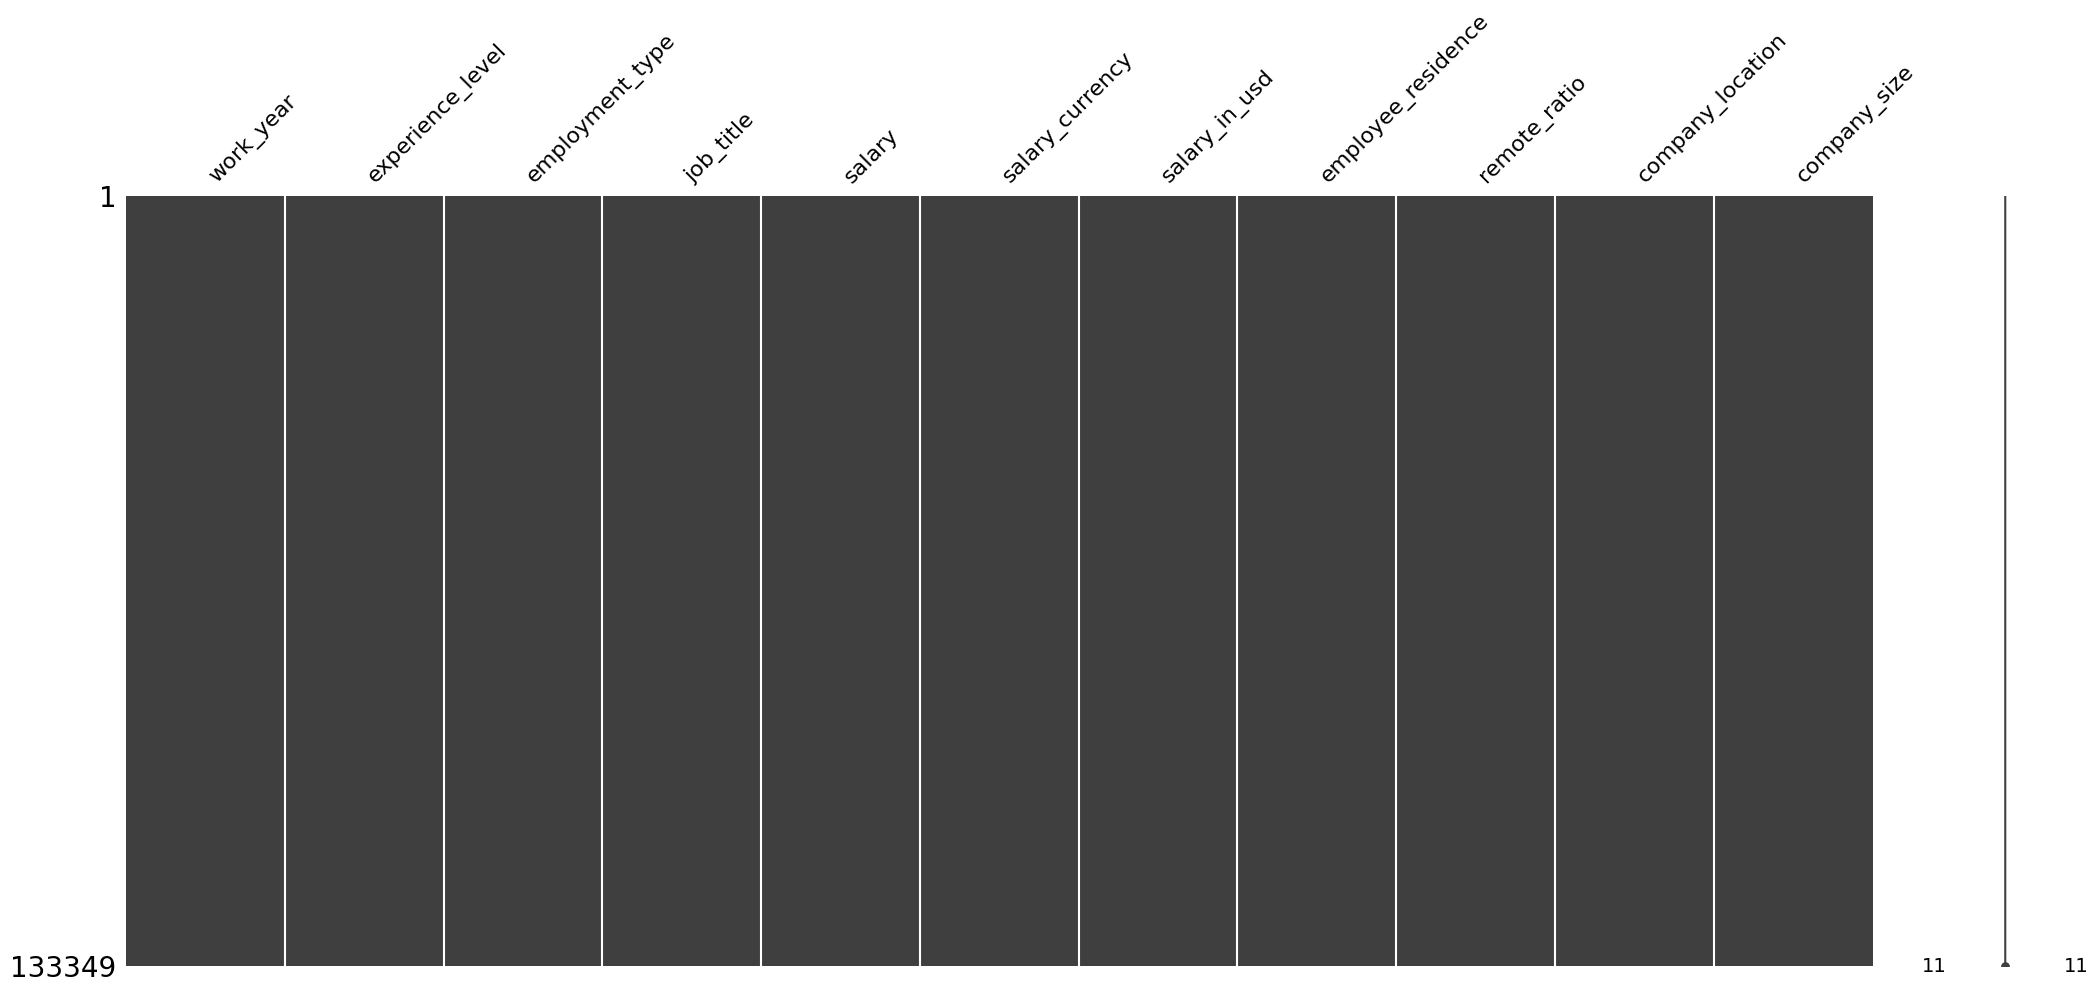

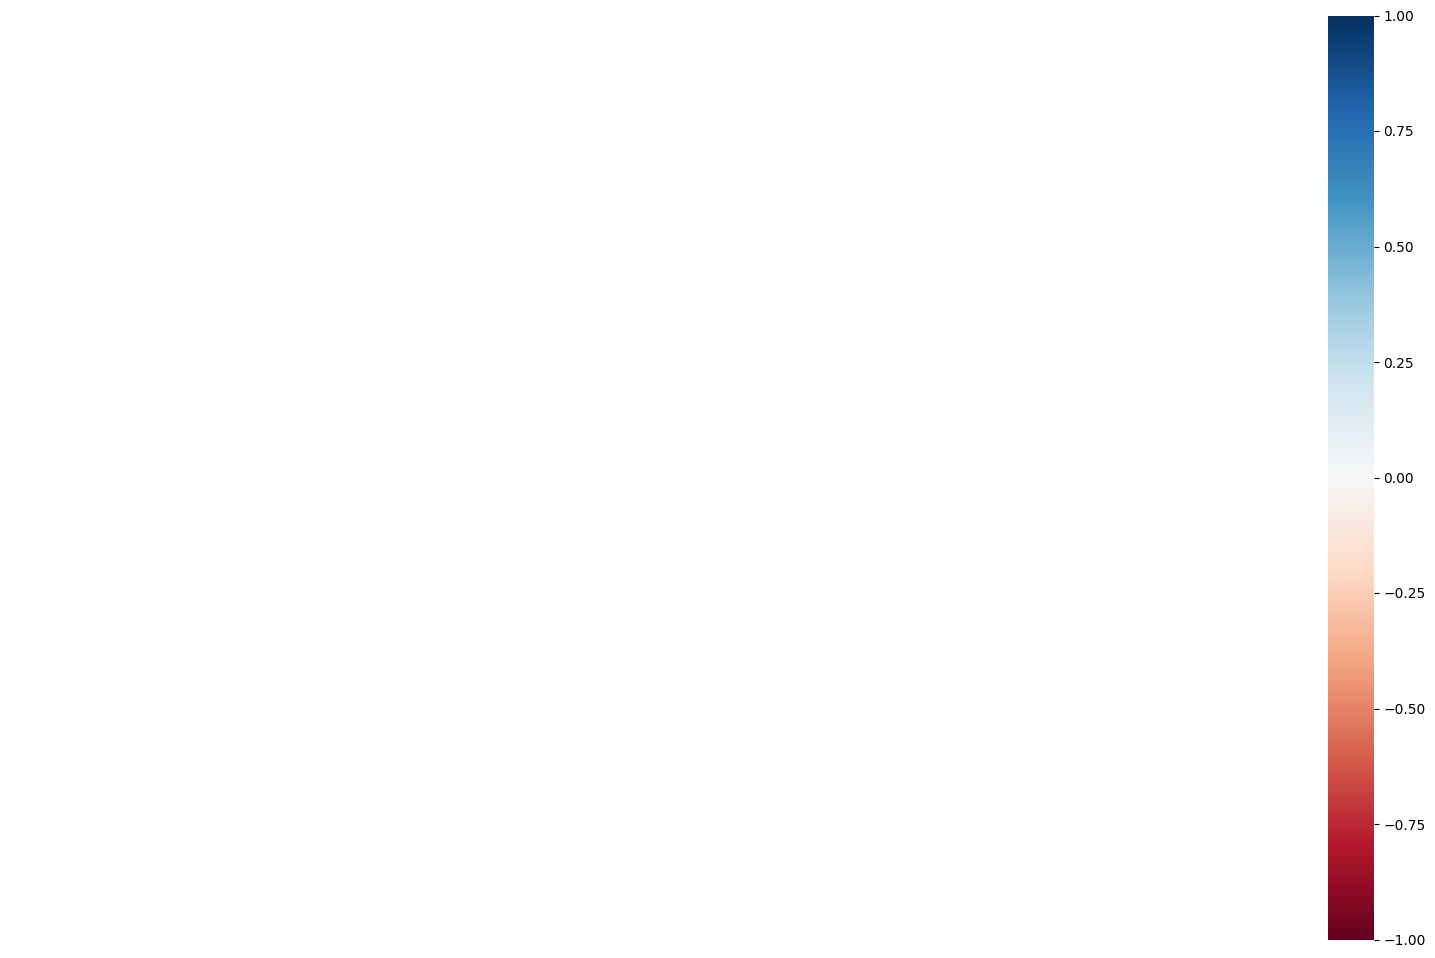

In [7]:
# Visualize missing data (optional)
msno.matrix(df)
msno.heatmap(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133349 non-null  int64 
 1   experience_level    133349 non-null  object
 2   employment_type     133349 non-null  object
 3   job_title           133349 non-null  object
 4   salary              133349 non-null  int64 
 5   salary_currency     133349 non-null  object
 6   salary_in_usd       133349 non-null  int64 
 7   employee_residence  133349 non-null  object
 8   remote_ratio        133349 non-null  int64 
 9   company_location    133349 non-null  object
 10  company_size        133349 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [18]:
object_column_names = df.select_dtypes(include='object').columns.tolist()
print(object_column_names)

['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [20]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=object_column_names)

In [21]:
df_encoded

work_year   salary  salary_in_usd  remote_ratio  experience_level_EN  \
0            2025   214000         214000           100                False   
1            2025   136000         136000           100                False   
2            2025   158800         158800             0                False   
3            2025   139200         139200             0                False   
4            2025    90000          90000             0                 True   
...           ...      ...            ...           ...                  ...   
133344       2020   412000         412000           100                False   
133345       2021   151000         151000           100                False   
133346       2020   105000         105000           100                 True   
133347       2020   100000         100000           100                 True   
133348       2021  7000000          94665            50                False   

        experience_level_EX  experience_level_MI  experience_level_SE  \
0                     False                False                 True   
1                     False                False                 True   
2                     False                 True                False   
3                     False                 True                False   
4                     False                False                False   
...                     ...                  ...                  ...   
133344                False                False                 True   
133345                False                 True                False   
133346                False                False                False   
133347                False                False                False   
133348                False                False                 True   

        employment_type_CT  employment_type_FL  ...  company_location_UA  \
0                    False               False  ...                False   
1                    False               False  ...                False   
2                    False               False  ...                False   
3                    False               False  ...                False   
4                    False               False  ...                False   
...                    ...                 ...  ...                  ...   
133344               False               False  ...                False   
133345               False               False  ...                False   
133346               False               False  ...                False   
133347                True               False  ...                False   
133348               False               False  ...                False   

        company_location_US  company_location_VE  company_location_VN  \
0                      True                False                False   
1                      True                False                False   
2                     False                False                False   
3                     False                False                False   
4                      True                False                False   
...                     ...                  ...                  ...   
133344                 True                False                False   
133345                 True                False                False   
133346                 True                False                False   
133347                 True                False                False   
133348                False                False                False   

        company_location_XK  company_location_ZA  company_location_ZM  \
0                     False                False                False   
1                     False                False                False   
2                     False                False                False   
3                     False                False                False   
4              

In [9]:
df.describe()

work_year        salary  salary_in_usd   remote_ratio
count  133349.000000  1.333490e+05  133349.000000  133349.000000
mean     2024.358705  1.632833e+05  157617.272098      20.905669
std         0.680788  2.173860e+05   74288.363097      40.590044
min      2020.000000  1.400000e+04   15000.000000       0.000000
25%      2024.000000  1.060200e+05  106000.000000       0.000000
50%      2024.000000  1.470000e+05  146206.000000       0.000000
75%      2025.000000  1.990000e+05  198000.000000       0.000000
max      2025.000000  3.040000e+07  800000.000000     100.000000

In [10]:
df.company_location.value_counts()

company_location
US    119641
CA      5239
GB      3719
AU       522
NL       404
       ...  
AD         1
QA         1
MU         1
OM         1
MD         1
Name: count, Length: 95, dtype: int64

In [12]:
df[df.company_location == 'BE']

work_year experience_level employment_type                  job_title  \
4782         2025               SE              FT      AI Research Scientist   
8599         2025               SE              FT          Platform Engineer   
8600         2025               SE              FT          Platform Engineer   
35316        2025               SE              FT                AI Engineer   
45434        2024               SE              FT              Product Owner   
50596        2025               SE              FT               Data Analyst   
50597        2025               SE              FT               Data Analyst   
51817        2025               MI              FT             Data Scientist   
51818        2025               MI              FT             Data Scientist   
56293        2025               EN              FT                AI Engineer   
56294        2025               EN              FT                AI Engineer   
58884        2025               SE              FT           Systems Engineer   
58885        2025               SE              FT           Systems Engineer   
70014        2024               SE              FT               Head of Data   
72178        2024               SE              FT              Data Engineer   
72179        2024               SE              FT              Data Engineer   
72198        2024               SE              FT           Systems Engineer   
72199        2024               SE              FT           Systems Engineer   
91745        2024               SE              FT  Machine Learning Engineer   
91746        2024               SE              FT  Machine Learning Engineer   
91761        2024               SE              FT  Machine Learning Engineer   
91762        2024               SE              FT  Machine Learning Engineer   
100445       2024               SE              FT          Software Engineer   
100446       2024               SE              FT          Software Engineer   
132649       2022               EN              FT             Data Scientist   
132688       2022               EN              FT             Data Scientist   
133114       2021               SE              FT  Machine Learning Engineer   
133284       2021               MI              FT  Machine Learning Engineer   

        salary salary_currency  salary_in_usd employee_residence  \
4782     75000             EUR          78947                 BE   
8599    121900             USD         121900                 BE   
8600     76000             USD          76000                 BE   
35316    77000             EUR          81052                 BE   
45434    85000             EUR          94444                 BE   
50596    92050             USD          92050                 BE   
50597    40900             USD          40900                 BE   
51817    65551             USD          65551                 BE   
51818    65551             USD          65551                 BE   
56293    27828             EUR          29292                 BE   
56294    27828             EUR          29292                 BE   
58884   189175             USD         189175                 BE   
58885   104650             USD         104650                 BE   
70014    66000             EUR          73333                 BE   
72178   183300             USD         183300                 BE   
72179   101400             USD         101400                 BE   
72198   220900             USD         220900                 BE   
72199   122200             USD         122200                 BE   
91745   150000             EUR         166666                 BE   
91746   103000             EUR         114444                 BE   
91761   164000             EUR         182222                 BE   
91762   113000             EUR         125555                 BE   
100445  181000             USD         181000                 BE   
100446  145000            

In [13]:
df[df.company_location == 'NL']

work_year experience_level employment_type                  job_title  \
55           2025               MI              FT                 Consultant   
56           2025               MI              FT                 Consultant   
299          2025               MI              FT           Business Analyst   
300          2025               MI              FT           Business Analyst   
733          2025               EN              FT             Data Scientist   
...           ...              ...             ...                        ...   
132678       2022               EX              FT         Research Scientist   
133056       2022               SE              FT  Machine Learning Engineer   
133209       2020               EN              FT         Research Scientist   
133223       2021               MI              PT              Data Engineer   
133333       2021               MI              FT              Data Engineer   

        salary salary_currency  salary_in_usd employee_residence  \
55       72000             EUR          75789                 NL   
56       36000             EUR          37894                 NL   
299      84000             EUR          88421                 NL   
300      48000             EUR          50526                 NL   
733      72000             EUR          75789                 NL   
...        ...             ...            ...                ...   
132678   80000             EUR          84053                 NL   
133056   57000             EUR          59888                 NL   
133209   42000             USD          42000                 NL   
133223   59000             EUR          69741                 NL   
133333   38400             EUR          45391                 NL   

        remote_ratio company_location company_size  
55                 0               NL            M  
56                 0               NL            M  
299                0               NL            M  
300                0               NL            M  
733                0               NL            M  
...              ...              ...          ...  
132678             0               NL            L  
133056           100               NL            L  
133209            50               NL            L  
133223           100               NL            L  
133333           100               NL            L  

[404 rows x 11 columns]

In [17]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['salary_in_usd']))
df[z_scores < 3]

work_year experience_level employment_type                 job_title  \
0            2025               SE              FT        Solutions Engineer   
1            2025               SE              FT        Solutions Engineer   
2            2025               MI              FT             Data Engineer   
3            2025               MI              FT             Data Engineer   
4            2025               EN              FT             Data Engineer   
...           ...              ...             ...                       ...   
133343       2021               SE              FT           Data Specialist   
133345       2021               MI              FT  Principal Data Scientist   
133346       2020               EN              FT            Data Scientist   
133347       2020               EN              CT     Business Data Analyst   
133348       2021               SE              FT            Data Scientist   

         salary salary_currency  salary_in_usd employee_residence  \
0        214000             USD         214000                 US   
1        136000             USD         136000                 US   
2        158800             USD         158800                 AU   
3        139200             USD         139200                 AU   
4         90000             USD          90000                 US   
...         ...             ...            ...                ...   
133343   165000             USD         165000                 US   
133345   151000             USD         151000                 US   
133346   105000             USD         105000                 US   
133347   100000             USD         100000                 US   
133348  7000000             INR          94665                 IN   

        remote_ratio company_location company_size  
0                100               US            M  
1                100               US            M  
2                  0               AU            M  
3                  0               AU            M  
4                  0               US            M  
...              ...              ...          ...  
133343           100               US            L  
133345           100               US            L  
133346           100               US            S  
133347           100               US            L  
133348            50               IN            L  

[131937 rows x 11 columns]

In [ ]:
# Identify outliers using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Or cap outliers at a threshold
upper_limit = df_cleaned['salary_in_usd'].quantile(0.95)
df_cleaned['salary_in_usd'] = np.where(df['salary_in_usd'] > upper_limit, upper_limit, df['salary_in_usd'])

In [ ]:
# Full workflow example

def load_data(filepath):
    return pd.read_csv(filepath)

def handle_missing_values(df):
    return df.fillna(df.mean())

def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < 3).all(axis=1)]

def scale_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

# Example usage:
df = load_data('your_dataset.csv')
df = handle_missing_values(df)
df = remove_outliers(df)
df = scale_data(df)
df = encode_categorical(df, ['categorical_column_name'])
save_data(df, 'cleaned_preprocessed_data.csv')